# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response_data = requests.get(btc_url).json()

# Fetch current ETH price
eth_response_data = requests.get(eth_url).json()

# Compute current value of my crpto
my_btc_value = btc_response_data['data']['1']['quotes']['USD']['price']
my_eth_value = eth_response_data['data']['1027']['quotes']['USD']['price']

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $26702.00
The current value of your 5.3 ETH is $1717.14


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv('ALPACA_API_KEY')
alpaca_secret_key =os.getenv('ALPACA_SECRET_KEY')

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version = 'v2'
)

In [8]:
# Format current date as ISO format
today = pd.Timestamp('2023-06-16', tz = 'America/New_York').isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
df_portfolio = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
BTC = df_portfolio[df_portfolio['symbol']=='AGG'].drop('symbol', axis = 1)
ETH = df_portfolio[df_portfolio['symbol']=='SPY'].drop('symbol', axis = 1)

# Question towards the variables. When we were learning APIs the variables were fully capitalized when that's typically not
# a thing. Is there any reason for that in particular that makes this situation different from the rest?

# Concatenate the ticker DataFrames
df_portfolio = pd.concat([BTC, ETH], axis = 1, keys = ['AGG', 'SPY'])

# Preview DataFrame
df_portfolio

AGG                                              \
                            open    high     low  close   volume trade_count   
timestamp                                                                      
2023-06-16 04:00:00+00:00  98.09  98.275  97.905  98.14  4599777       26718   

                                         SPY                            \
                                vwap    open      high     low   close   
timestamp                                                                
2023-06-16 04:00:00+00:00  98.118495  443.02  443.6078  438.97  439.46   

                                                              
                              volume trade_count        vwap  
timestamp                                                     
2023-06-16 04:00:00+00:00  110461387      619074  440.999282

In [9]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio['AGG']['close'])
spy_close_price = float(df_portfolio['SPY']['close'])


# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $98.14
Current SPY closing price: $439.46


In [10]:
# Compute the current value of shares
my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21973.00
The current value of your 200 AGG shares is $19628.00


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
crypto_assets = my_btc_value + my_eth_value
stock_assets = my_agg_value + my_spy_value

asset_data = {
    'total': [crypto_assets, stock_assets],
    'asset': ['crypto', 'shares']
}

# Create savings DataFrame
df_savings = pd.DataFrame(asset_data).set_index('asset')

# Display savings DataFrame
display(df_savings)

,total
asset,
crypto,28419.14
shares,41601.00


<Axes: title={'center': 'Composition of Personal Savings'}, ylabel='total'>

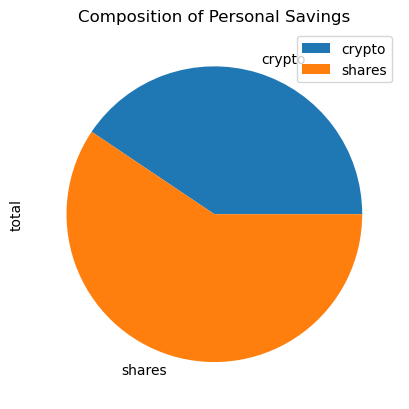

In [12]:
# Plot savings pie chart
df_savings.plot.pie(y = 'total', title = 'Composition of Personal Savings')

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = df_savings['total'].sum()

# Validate saving health
if total_savings > emergency_fund:
    print('Congratulations! You have enough money in your emergency fund.')
elif total_savings == emergency_fund:
    print('Congratulations! You have reached your financial goal.')
else:
    print(f"You're ${emergency_fund - total_savings:0.2f} away from reaching your goal.")

Congratulations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2018-06-16', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-06-16', tz='America/New_York').isoformat()

In [15]:
# Get 5 years' worth of historical data for SPY and AGG
df_stock_data = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
BTC = df_stock_data[df_stock_data['symbol']=='AGG'].drop('symbol', axis = 1)
ETH = df_stock_data[df_stock_data['symbol']=='SPY'].drop('symbol', axis = 1)



# Concatenate the ticker DataFrames
df_stock_data = pd.concat([BTC, ETH], axis = 1, keys = ['AGG', 'SPY'])

# Display sample data
df_stock_data.head()

AGG                                      \
                             open      high     low    close   volume   
timestamp                                                               
2018-06-18 04:00:00+00:00  105.93  105.9300  105.80  105.900  2359452   
2018-06-19 04:00:00+00:00  106.05  106.1100  105.98  106.010  2184239   
2018-06-20 04:00:00+00:00  106.06  106.0600  105.79  105.805  2403650   
2018-06-21 04:00:00+00:00  105.88  105.9599  105.81  105.840  2896731   
2018-06-22 04:00:00+00:00  105.82  105.9400  105.80  105.940  1957177   

                                                      SPY                   \
                          trade_count        vwap    open     high     low   
timestamp                                                                    
2018-06-18 04:00:00+00:00       10590  105.864382  275.49  276.700  274.95   
2018-06-19 04:00:00+00:00       10342  106.041881  274.00  275.750  273.53   
2018-06-20 04:00:00+00:00        9220  105.886127  276.26  276.720  275.59   
2018-06-21 04:00:00+00:00       11286  105.870603  275.96  275.980  273.68   
2018-06-22 04:00:00+00:00        7830  105.897826  275.66  275.785  274.49   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2018-06-18 04:00:00+00:00  276.59  53163695      221103  276.151288  
2018-06-19 04:00:00+00:00  275.48  97669710      337433  274.931757  
2018-06-20 04:00:00+00:00  276.01  54051558      212283  276.065730  
2018-06-21 04:00:00+00:00  274.24  75659252      289344  274.618337  
2018-06-22 04:00:00+00:00  274.76  58532014      231536  275.099940

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
num_sims = 500

In [17]:
# Printing the simulation input data
MC_portfolio = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.6, .4],
    num_simulation = num_sims,
    num_trading_days = 252 * 30
)

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_portfolio.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 110.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 120.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 130.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 140.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 150.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 160.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 170.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 180.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 190.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 200.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 210.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 220.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 230.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 240.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 250.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 260.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 270.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 280.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 290.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 300.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 310.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 320.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 330.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 340.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 350.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 360.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 370.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 380.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 390.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 400.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 410.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 420.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 430.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 440.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 450.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 460.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 470.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 480.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 490.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999552,0.997674,1.001580,0.997106,1.004467,1.007369,1.000039,0.988853,1.001360,1.005704,...,0.999312,0.997182,1.001049,0.994119,0.987700,1.004279,1.005247,0.992796,0.998702,0.991761
2,1.010697,1.005031,1.008340,0.985313,1.005365,1.011025,1.003089,0.987717,1.003315,1.001514,...,0.995996,0.999804,1.004539,1.002523,0.986446,0.998149,1.003130,0.989828,0.994015,0.990340
3,1.014391,1.004362,1.010166,0.987445,1.007893,1.023813,1.008608,0.996932,1.003055,1.004635,...,0.994014,0.996277,1.006066,0.997446,0.991921,1.004132,1.000412,0.991880,0.999432,0.983403
4,1.015946,1.009921,1.017316,0.987841,1.006545,1.018427,1.003742,1.006727,1.003563,0.990979,...,0.996943,0.992442,1.003270,1.000595,0.996331,1.004926,1.002987,0.999312,0.986121,0.983013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.854520,2.005942,1.329111,2.044666,5.158819,5.723636,1.693575,10.919921,2.234552,2.055028,...,3.136271,1.698229,2.044431,3.278689,2.197737,1.072617,2.961791,1.853299,3.971902,4.262341
7557,2.826249,2.014732,1.324995,2.062234,5.115412,5.717949,1.689262,10.925506,2.213528,2.068469,...,3.159705,1.707393,2.051964,3.292478,2.205177,1.071957,2.970298,1.845227,3.996604,4.289870
7558,2.813936,2.016007,1.318791,2.076119,5.116976,5.732528,1.691205,10.974653,2.198789,2.071054,...,3.172267,1.700996,2.029762,3.274529,2.203026,1.067157,2.957571,1.854520,3.985332,4.334609
7559,2.821844,2.017002,1.327626,2.090748,5.119907,5.721206,1.690222,10.887041,2.219974,2.048167,...,3.132510,1.722824,2.031740,3.263758,2.213471,1.076408,2.953418,1.854319,3.968573,4.355898


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

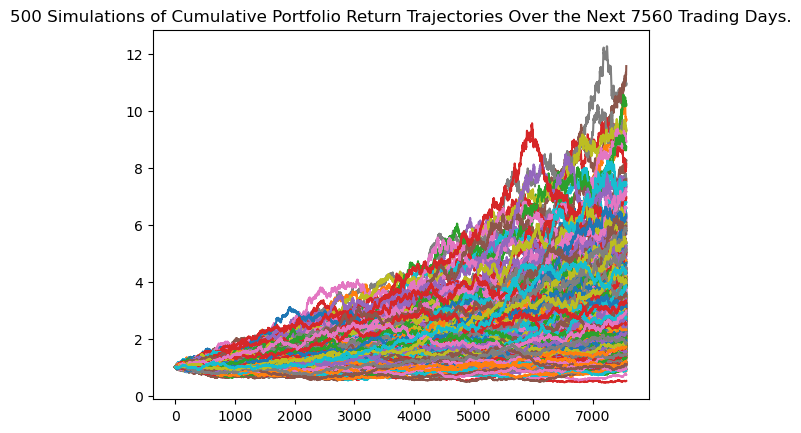

In [19]:
# Plot simulation outcomes
MC_portfolio.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

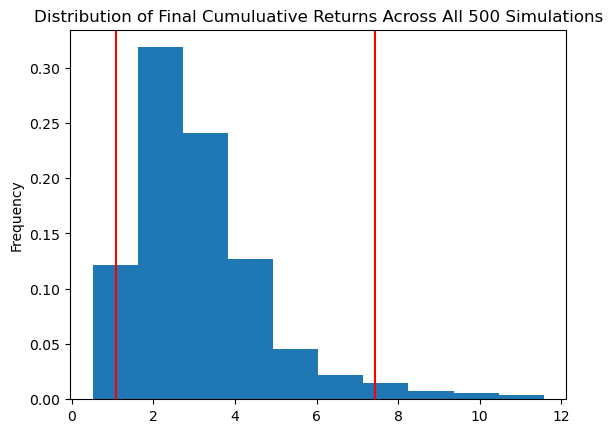

In [20]:
# Plot probability distribution and confidence intervals
MC_portfolio.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl = MC_portfolio.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl)

count           500.000000
mean              3.088008
std               1.635125
min               0.512019
25%               1.973584
50%               2.791912
75%               3.824586
max              11.570331
95% CI Lower      1.077994
95% CI Upper      7.428597
Name: 7560, dtype: float64


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(summary_tbl[8] * initial_investment, 2)
ci_upper = round(summary_tbl[9] * initial_investment, 2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $21559.87 and $148571.95


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(summary_tbl[8] * initial_investment, 2)
ci_upper = round(summary_tbl[9] * initial_investment, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $32339.81 and $222857.92


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_5_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.9, .1],
    num_simulation = num_sims,
    num_trading_days = 252 * 5
)

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_portfolio_5_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 110.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 120.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 130.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 140.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 150.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 160.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 170.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 180.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 190.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 200.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 210.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 220.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 230.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 240.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 250.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 260.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 270.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 280.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 290.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 300.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 310.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 320.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 330.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 340.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 350.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 360.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 370.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 380.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 390.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 400.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 410.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 420.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 430.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 440.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 450.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 460.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 470.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 480.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 490.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000532,0.994207,1.001798,1.002612,1.002059,1.002809,1.006993,0.995466,0.993819,0.995943,...,1.006818,1.002610,1.003016,1.002412,0.996673,0.993705,0.997572,1.002360,0.996308,0.997608
2,1.005513,0.992816,0.999982,1.001264,1.003875,1.004009,1.012007,0.994131,0.998293,0.997765,...,1.003302,0.998795,1.002917,1.003528,1.000599,0.994368,0.994164,1.004572,0.999063,0.993030
3,1.000891,0.995241,0.995098,1.001451,1.006170,1.006050,1.005994,0.989602,1.001294,1.004158,...,1.006279,0.998465,0.998165,1.000014,1.001448,0.995497,0.997477,0.998888,0.999241,0.997606
4,0.994833,0.996233,0.994956,1.003093,1.007136,1.009338,1.013747,0.983212,1.000308,1.003668,...,1.004815,0.998662,0.996045,1.002677,0.998912,0.991315,0.999795,1.001696,0.996532,0.991924
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,0.787215,1.028099,1.016311,0.843816,1.271037,1.071242,0.757989,1.143826,1.198506,0.817760,...,0.868315,1.112627,0.892113,1.208388,0.881763,1.213831,0.954854,1.009241,0.919326,1.200754
1257,0.785549,1.025606,1.016275,0.844741,1.271294,1.069519,0.756491,1.142196,1.193900,0.818474,...,0.866210,1.108098,0.893111,1.206130,0.882321,1.215163,0.946693,1.016260,0.919777,1.202107
1258,0.784013,1.025019,1.013607,0.844093,1.277490,1.065774,0.752023,1.140227,1.190283,0.822977,...,0.862211,1.101984,0.896312,1.209143,0.880600,1.218299,0.943575,1.017220,0.920478,1.201689
1259,0.783736,1.025708,1.016816,0.843444,1.270130,1.063018,0.749300,1.136077,1.190152,0.819472,...,0.863265,1.100133,0.896023,1.211024,0.882864,1.215084,0.943264,1.012584,0.918768,1.202542


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

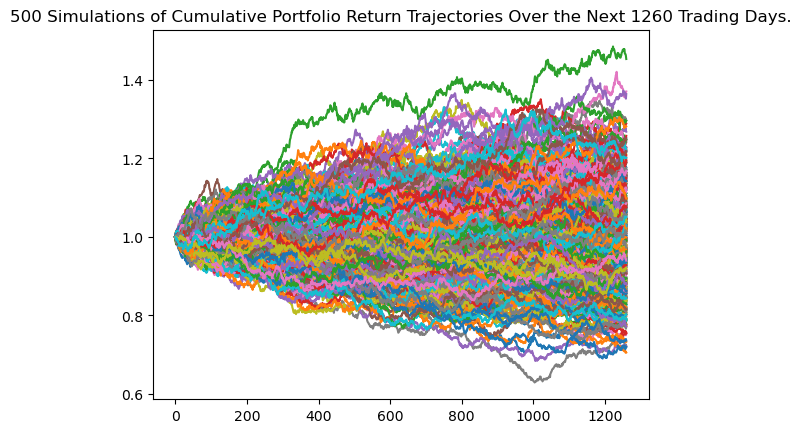

In [26]:
# Plot simulation outcomes
MC_portfolio_5_years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

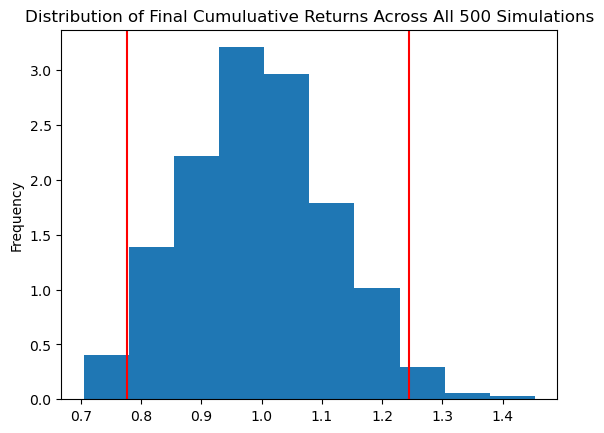

In [27]:
# Plot probability distribution and confidence intervals
MC_portfolio_5_years.plot_distribution()

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_five = MC_portfolio_5_years.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl_five)

count           500.000000
mean              0.993359
std               0.122885
min               0.705167
25%               0.907174
50%               0.990731
75%               1.074595
max               1.453619
95% CI Lower      0.776988
95% CI Upper      1.244610
Name: 1260, dtype: float64


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [29]:
# Set initial investment
initial_investment_five = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_five = round(summary_tbl_five[8] * initial_investment_five, 2)
ci_upper_five = round(summary_tbl_five[9] * initial_investment_five, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $15539.75 and $24892.2


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10_years = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [.9, .1],
    num_simulation = num_sims,
    num_trading_days = 252 * 10
)

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_portfolio_10_years.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 110.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 120.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 130.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 140.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 150.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 160.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 170.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 180.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 190.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 200.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 210.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 220.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 230.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 240.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 250.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 260.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 270.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 280.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 290.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 300.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 310.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 320.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 330.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 340.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 350.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 360.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 370.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 380.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 390.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 400.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 410.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 420.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 430.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 440.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 450.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 460.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 470.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 480.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

Running Monte Carlo simulation number 490.


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()
C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_retu

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997405,1.001427,1.002030,1.000814,1.001236,0.997823,0.999664,0.999954,1.000280,1.004017,...,1.000906,1.001259,1.002440,0.998626,1.006256,0.998423,0.999836,0.997396,0.993278,0.996955
2,0.992917,1.000732,1.001693,0.995020,1.007965,0.995341,1.002062,0.998373,1.003776,1.007403,...,1.003513,1.000341,0.998544,0.995888,1.006755,1.000213,1.006822,1.000390,0.993904,0.992069
3,0.990605,1.004801,1.003511,0.991954,1.010272,0.997693,0.995912,0.998771,0.997052,1.006402,...,0.999108,0.997047,0.997241,1.002896,0.999505,0.990449,1.011004,1.005812,0.992736,0.992989
4,0.991861,1.004188,1.000962,0.992330,1.008965,0.995596,0.996242,1.000034,0.999087,1.002503,...,0.995931,0.997906,0.995752,1.001524,1.006027,0.993531,1.007049,1.008921,0.995671,0.990760
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.033639,0.881388,0.915026,0.836599,0.914146,0.734082,1.613776,1.197167,0.940772,0.891934,...,1.008739,1.093260,1.005810,0.794277,1.025950,0.903256,0.822732,0.905932,0.737414,0.987673
2517,1.032872,0.875714,0.913438,0.841235,0.916445,0.735840,1.616785,1.202396,0.941271,0.889989,...,1.017010,1.100931,1.002450,0.793504,1.033826,0.905877,0.829245,0.905870,0.739474,0.986279
2518,1.033389,0.873587,0.910893,0.841215,0.920685,0.735034,1.625519,1.204575,0.944605,0.883391,...,1.014617,1.102244,1.005686,0.792605,1.033320,0.904737,0.825033,0.907019,0.740790,0.991979
2519,1.033463,0.878500,0.909396,0.842653,0.916716,0.730263,1.627882,1.206029,0.941220,0.881772,...,1.011931,1.104153,1.004351,0.790157,1.033883,0.907048,0.823979,0.903875,0.739867,0.994807


<Axes: title={'center': '500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

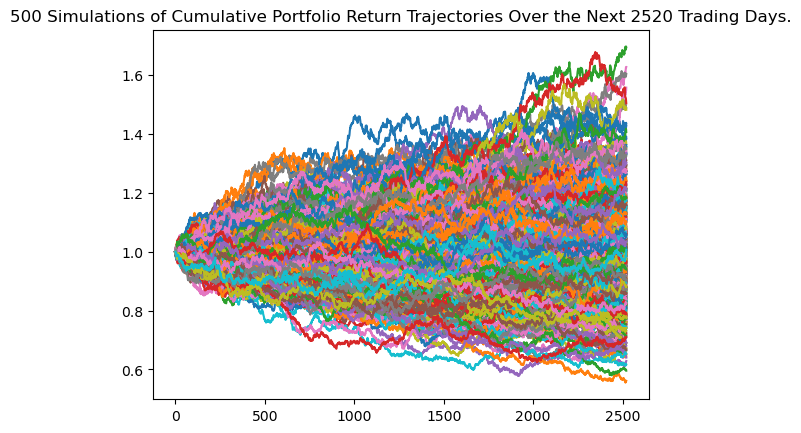

In [32]:
# Plot simulation outcomes
MC_portfolio_10_years.plot_simulation()

<Axes: title={'center': 'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

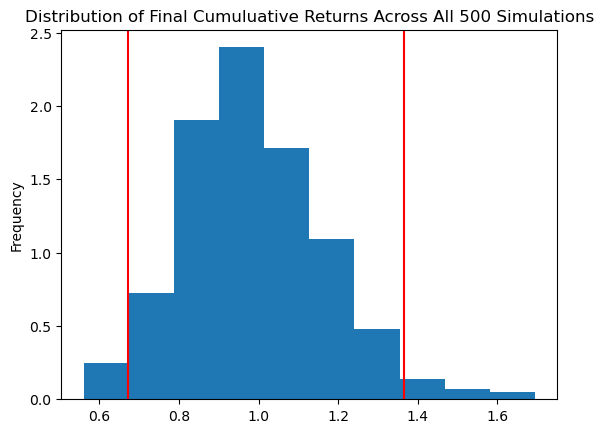

In [33]:
# Plot probability distribution and confidence intervals
MC_portfolio_10_years.plot_distribution()

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
summary_tbl_ten = MC_portfolio_10_years.summarize_cumulative_return()

# Print summary statistics
print(summary_tbl_ten)

count           500.000000
mean              0.988434
std               0.176782
min               0.560961
25%               0.871768
50%               0.971800
75%               1.084094
max               1.694280
95% CI Lower      0.671355
95% CI Upper      1.364356
Name: 2520, dtype: float64


C:\Users\flami\Downloads\Homework\Week 5\UNCC-VIRT-FIN-PT-05-2023-U-LOLC-main-Homework-05-APIs-Instructions\Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:172: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  return metrics.append(ci_series)


In [38]:
# Set initial investment
initial_investment_ten = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(summary_tbl_ten[8] * initial_investment_ten, 2)
ci_upper_ten = round(summary_tbl_ten[9] * initial_investment_ten, 2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $13427.09 and $27287.11
